## Separando do todo

* Sperar o lote
* Gerar altura em relação ao solo
* Agrupar por Clusters (DBSCAN)
* Calcular Normal

In [1]:
import pdal
import json
import numpy as np

In [2]:
bounds = ([333060, 333090], [7396500, 7396530])
# Polygon ((332426.68348924710880965 7390661.41352917719632387, 332431.68747117172461003 7390648.28714181017130613, 332468.38333861867431551 7390662.7914372431114316, 332463.59692112560151145 7390675.91782461106777191, 332426.68348924710880965 7390661.41352917719632387))

In [3]:
ept = [
    {
      "type": "readers.ept",
      "filename": "https://ept-m3dc-pmsp.s3-sa-east-1.amazonaws.com/ept.json",
      "bounds": str(bounds)
    },
    {   
        "type":"filters.hag_delaunay"
#     },
#     {   "type":"filters.eigenvalues",
#         "knn":16
    },
    {   "type":"filters.normal",
        "knn":30
    },
    {
        "type":"filters.dbscan",
        "min_points":10,
        "eps":2.0,
        "dimensions":"X,Y,Z"
    },
#     {
#         "type":"filters.cluster"
#     },
    {
        "type":"writers.las",
        "compression":"laszip",
        "filename":"results/coreto-luz.laz"
    }
]

pipeline = pdal.Pipeline(json.dumps(ept))
pipeline.validate()
%time n_points = pipeline.execute()
print(f'Pipeline selected {n_points} points')

CPU times: user 2.26 s, sys: 92 ms, total: 2.35 s
Wall time: 3.06 s
Pipeline selected 13496 points


In [4]:
pipeline.schema

{'schema': {'dimensions': [{'name': 'X', 'size': 8, 'type': 'floating'},
   {'name': 'Y', 'size': 8, 'type': 'floating'},
   {'name': 'Z', 'size': 8, 'type': 'floating'},
   {'name': 'Intensity', 'size': 2, 'type': 'unsigned'},
   {'name': 'ReturnNumber', 'size': 1, 'type': 'unsigned'},
   {'name': 'NumberOfReturns', 'size': 1, 'type': 'unsigned'},
   {'name': 'ScanDirectionFlag', 'size': 1, 'type': 'unsigned'},
   {'name': 'EdgeOfFlightLine', 'size': 1, 'type': 'unsigned'},
   {'name': 'Classification', 'size': 1, 'type': 'unsigned'},
   {'name': 'ScanAngleRank', 'size': 4, 'type': 'floating'},
   {'name': 'UserData', 'size': 1, 'type': 'unsigned'},
   {'name': 'PointSourceId', 'size': 2, 'type': 'unsigned'},
   {'name': 'GpsTime', 'size': 8, 'type': 'floating'},
   {'name': 'Red', 'size': 2, 'type': 'unsigned'},
   {'name': 'Green', 'size': 2, 'type': 'unsigned'},
   {'name': 'Blue', 'size': 2, 'type': 'unsigned'},
   {'name': 'OriginId', 'size': 4, 'type': 'unsigned'},
   {'name': '

In [5]:
import pandas as pd
arr = pipeline.arrays[0]
df = pd.DataFrame(arr)
# print(df.head().to_latex(index=False))
df.head()

,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,ScanAngleRank,...,Red,Green,Blue,OriginId,HeightAboveGround,NormalX,NormalY,NormalZ,Curvature,ClusterID
0,333069.84,7396523.41,737.12,6,2,2,1,0,2,18.0,...,22272,24320,23808,2416,0.000000,-0.084285,0.064717,0.994338,0.011417,-1
1,333068.42,7396522.83,756.77,22,1,1,0,0,5,-11.0,...,19456,22272,19968,2416,19.673504,0.514407,0.061121,0.855365,0.030826,0
2,333060.54,7396515.26,737.35,14,1,1,1,0,2,-10.0,...,7168,10240,15616,2416,0.000000,-0.003472,-0.007064,0.999969,0.005430,1
3,333080.45,7396516.96,737.70,9,2,2,0,0,2,-6.0,...,36864,28672,26624,2416,0.000000,0.114660,0.082844,0.989944,0.011798,2
4,333080.83,7396514.57,749.52,11,1,1,0,0,5,-10.0,...,45824,35584,31744,2416,12.130000,-0.906293,-0.049680,0.419720,0.091398,3


In [6]:
# Reduzindo valores a mínimos para poderem ser visualizados
df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']] - df[['X', 'Y', 'Z']].min()

In [7]:
df.Classification.unique()

array([ 2,  5, 19, 20,  6], dtype=uint8)

In [8]:
## Separando apenas Buildings
bd = df[df.Classification.isin([6])].reset_index()

In [9]:
bd

,index,X,Y,Z,Intensity,ReturnNumber,NumberOfReturns,ScanDirectionFlag,EdgeOfFlightLine,Classification,...,Red,Green,Blue,OriginId,HeightAboveGround,NormalX,NormalY,NormalZ,Curvature,ClusterID
0,77,20.20,17.27,6.96,15,1,1,0,0,6,...,29696,24064,21504,2416,5.998857,0.243799,0.128255,0.961308,0.007795,5
1,80,16.56,8.33,7.56,24,1,1,1,0,6,...,43264,28416,25088,2416,6.650000,0.120495,-0.249908,0.960743,0.009208,5
2,81,16.54,17.53,7.78,17,1,1,0,0,6,...,43776,28672,25088,2416,6.730000,0.288936,0.119784,0.949825,0.014152,5
3,82,16.49,20.37,7.70,28,1,1,1,0,6,...,43776,30208,26624,2416,6.763024,0.363560,0.036649,0.930850,0.009360,5
4,83,14.68,17.22,8.75,28,1,1,0,0,6,...,55808,43520,36864,2416,7.690000,0.022519,0.190995,0.981333,0.027178,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,11288,20.53,15.25,7.15,14,2,2,1,0,6,...,42752,33792,28416,2416,6.470000,0.226878,0.146035,0.962912,0.011123,5
2144,11289,20.39,15.70,7.22,24,2,2,1,0,6,...,47360,34816,29440,2416,6.230000,0.178252,0.163425,0.970319,0.008842,5
2145,11290,20.25,16.12,6.98,25,2,2,1,0,6,...,46080,32768,27904,2416,5.990000,0.222561,0.140110,0.964798,0.008318,5
2146,11291,19.97,17.00,6.86,28,1,1,1,0,6,...,46336,33024,29440,2416,5.870000,0.225926,0.156127,0.961552,0.006769,5


In [10]:
bd.ClusterID.unique()

array([ 5,  8, -1])

In [11]:
color_choices = np.random.rand(bd.ClusterID.max()+1, 3)

In [12]:
colors = list(map(lambda x: color_choices[x], bd.ClusterID))

In [14]:
import ipyvolume as p3 

fig = p3.figure(width=1000)
fig.xlabel='Y'
fig.ylabel='Z'
fig.zlabel='X'
all_points = p3.scatter(bd['Y'], bd['Z'], bd['X'], color=colors, size=1)
# all_points = p3.scatter(bd['Y'], bd['Z'], bd['X'], color=list(map(lambda x: [x,x,x], bd.Curvature)), size=1, marker='square_2d')

p3.squarelim()

p3.show()

## Gerando o polígono de cada Cluster

Utilizando o Alpha Shape https://gist.github.com/dwyerk/10561690

In [15]:
import shapely.geometry as geometry
from scipy.spatial import Delaunay

In [16]:
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import Delaunay
import numpy as np
import math

def alpha_shape(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set
    of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the
        gooeyness of the border. Smaller numbers
        don't fall inward as much as larger numbers.
        Too large, and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull

    coords = np.array([point.coords[0] for point in points])
    tri = Delaunay(coords)
    triangles = coords[tri.vertices]
    a = ((triangles[:,0,0] - triangles[:,1,0]) ** 2 + (triangles[:,0,1] - triangles[:,1,1]) ** 2) ** 0.5
    b = ((triangles[:,1,0] - triangles[:,2,0]) ** 2 + (triangles[:,1,1] - triangles[:,2,1]) ** 2) ** 0.5
    c = ((triangles[:,2,0] - triangles[:,0,0]) ** 2 + (triangles[:,2,1] - triangles[:,0,1]) ** 2) ** 0.5
    s = ( a + b + c ) / 2.0
    areas = (s*(s-a)*(s-b)*(s-c)) ** 0.5
    circums = a * b * c / (4.0 * areas)
    filtered = triangles[circums < (1.0 / alpha)]
    edge1 = filtered[:,(0,1)]
    edge2 = filtered[:,(1,2)]
    edge3 = filtered[:,(2,0)]
    edge_points = np.unique(np.concatenate((edge1,edge2,edge3)), axis = 0).tolist()
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points

In [17]:
points = bd[bd.ClusterID == bd.ClusterID.unique()[0]][['X', 'Y']].to_numpy()

In [18]:
poligono = alpha_shape(geometry.MultiPoint(points), 0.5)

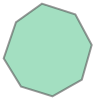

In [19]:
poligono[0].simplify(0.75)

## Agrupando as faces

In [82]:
from sklearn.cluster import DBSCAN, OPTICS, SpectralClustering, estimate_bandwidth, MeanShift
from sklearn import preprocessing

In [124]:
X = bd[bd.ClusterID == bd.ClusterID.unique()[0]][['NormalX', 'NormalY', 'NormalZ']]

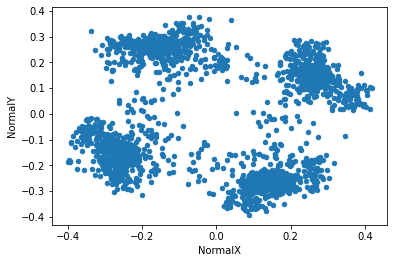

In [125]:
X.plot.scatter(x='NormalX', y='NormalY')

In [126]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [127]:
estimate_bandwidth(X)

0.4665152464882396

In [168]:
# clustering = DBSCAN(eps=0.05, min_samples=6).fit(X)
# clustering = SpectralClustering().fit(X)
clustering = MeanShift(bandwidth=0.3, cluster_all=False).fit(X)

In [169]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3])

In [170]:
clustering.labels_ 

array([2, 1, 2, ..., 2, 2, 2])

In [171]:
colors = np.random.rand(len(np.unique(clustering.labels_)), 3)
colors

array([[8.81520170e-01, 8.95640580e-01, 6.68248161e-01],
       [4.55054477e-01, 1.45013442e-01, 2.51331922e-01],
       [1.87910196e-01, 5.58995343e-01, 4.86271635e-02],
       [6.61492367e-01, 1.67854033e-04, 9.82888383e-01],
       [1.99479272e-02, 5.11510990e-01, 5.07241413e-01]])

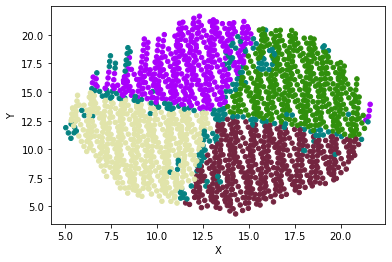

In [172]:
bd[bd.ClusterID == bd.ClusterID.unique()[0]].plot.scatter(x='X', y='Y', c=colors[clustering.labels_])

In [295]:
import open3d as o3d

In [296]:
bd[['X', 'Y', 'Z']].to_numpy()

array([[20.2 , 17.27,  6.96],
       [16.56,  8.33,  7.56],
       [16.54, 17.53,  7.78],
       ...,
       [21.16, 12.3 ,  7.64],
       [21.38, 12.56,  7.28],
       [20.11, 16.58,  7.1 ]])

In [297]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(bd[['X', 'Y', 'Z']].to_numpy())

In [298]:
pcd.normals = o3d.utility.Vector3dVector((bd[['NormalX', 'NormalY', 'NormalZ']].to_numpy()))

In [299]:
pcd

geometry::PointCloud with 2148 points.

In [300]:
o3d.visualization.draw_geometries([pcd])

In [ ]:
o3d.visualization.draw_geometries([pcd], point_show_normal=True)

In [302]:
plane_model, inliers = pcd.segment_plane(distance_threshold=0.50,
                                         ransac_n=8,
                                         num_iterations=1000)

In [303]:
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

Plane equation: 0.01x + -0.02y + 1.00z + -7.66 = 0


In [304]:
inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([outlier_cloud])

In [149]:
plane_model

array([ 0.02802781,  0.01395864,  0.99950968, -8.44516883])

In [101]:
import trimesh

In [107]:
# test on a sphere primitive
mesh = trimesh.creation.icosphere()

In [102]:
tri_points = trimesh.PointCloud(bd[['X', 'Y', 'Z']].to_numpy())

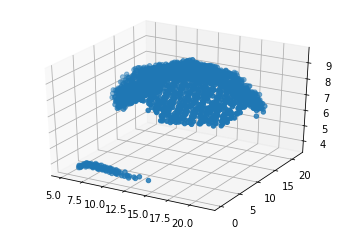

In [103]:
trimesh.points.plot_points(bd[['X', 'Y', 'Z']].to_numpy(), show=True)

In [119]:
# create a visualization scene with rays, hits, and mesh
tri_points.scene()

<trimesh.Scene(len(geometry)=1)>

In [116]:
tri_points


<trimesh.PointCloud(vertices.shape=(2148, 3))>

In [49]:

# estimate radius for rolling ball
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist   

mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
           pcd,
           o3d.utility.DoubleVector([radius, radius * 4]))

In [50]:
o3d.visualization.draw_geometries([mesh])

In [54]:
mesh2 = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd)

In [48]:
# create the triangular mesh with the vertices and faces from open3d
tri_mesh = trimesh.Trimesh(np.asarray(mesh.vertices), np.asarray(mesh.triangles),
                          vertex_normals=np.asarray(mesh.vertex_normals))

trimesh.convex.is_convex(tri_mesh)

False

In [64]:
tri_mesh.volume

141.7112839975847

In [16]:
roof_quiver = p3.quiver(bd['Y'], bd['Z'], bd['X'], bd['NormalY'], bd['NormalZ'], bd['NormalX'], color='orange', size=5)
fig.scatters.append(roof_quiver)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc048c9fbd0>,
      dtype=object)

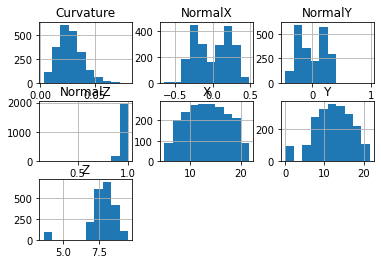

In [15]:
bd[['X', 'Y','Z', 'NormalX', 'NormalY', 'NormalZ', 'Curvature']].hist()

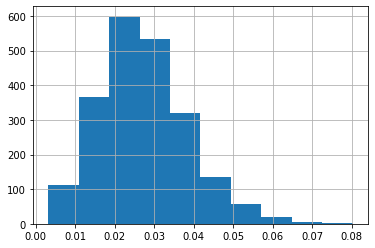

In [16]:
bd.Curvature.hist()

In [18]:
roof_model = p3.plot_trisurf(bd['Y'], bd['Z'], bd['X'], tri.simplices, color='red')
fig.meshes.append(roof_model)
roof_quiver.visible = False